In [1]:
from google.colab import files
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import math




In [3]:
uploaded = files.upload()
file_name = 'data.csv'


df = pd.read_csv(io.BytesIO(uploaded[file_name]))




Saving data.csv to data.csv


In [32]:
# print(df.head())
x_train = df['sqft_living'].head(1000)
y_train = df['price'].head(1000)
length = len(x_train)
# print(x_train)
# print(y_train)



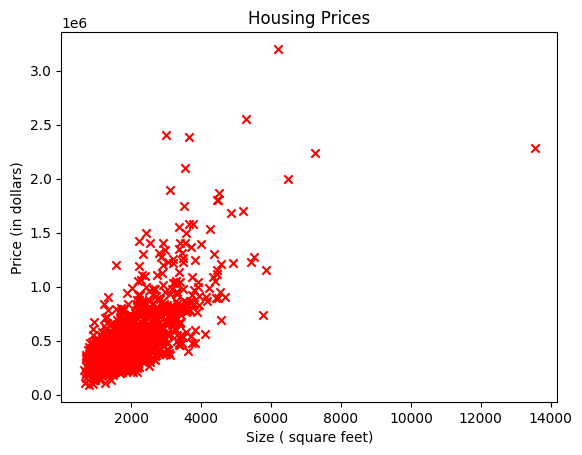

In [33]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel('Price (in dollars)')
plt.xlabel('Size ( square feet)')
plt.show()

In [49]:
def normalisation(x_train,y_train):
  # Calculate mean and standard deviation of x_train only
  y_mean = np.mean(y_train)
  y_std = np.std(y_train)
  x_mean = np.mean(x_train)
  x_std = np.std(x_train)

  # Normalise x_train
  x_train_normalised = (x_train - x_mean) / x_std
  y_train_normalised = (y_train - y_mean) / y_std

  # Return the normalised x_train and the original y_train
  return x_train_normalised,y_train_normalised


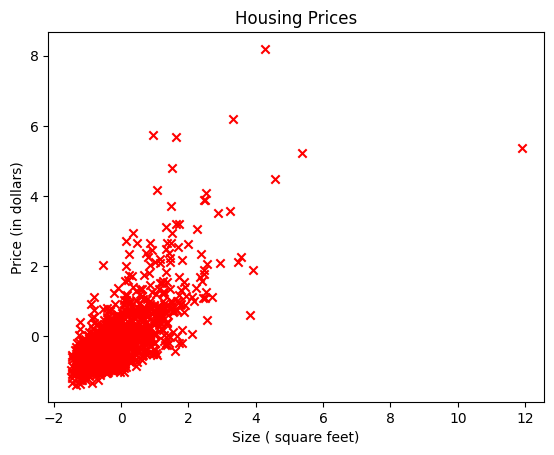

In [50]:
x_train_normal,y_train_normal = normalisation(x_train,y_train)
plt.scatter(x_train_normal, y_train_normal, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel('Price (in dollars)')
plt.xlabel('Size ( square feet)')
plt.show()

In [51]:
w = 0
b = 0
# to see the model representation
def compute_model_output(x_train, w, b):
  m = x_train.shape[0]
  f_wb = np.zeros(m) # Initialize f_wb as a NumPy array of zeros with the same size as x_train
  for i in range(m):
    f_wb[i] = x_train[i] * w + b # Store the prediction for each data point
  return f_wb


def compute_cost(x_train_normal, y_train_normal, w, b):
  m = x_train_normal.shape[0] # Use the normalized x_train for cost calculation
  total_cost = 0
  for i in range(m):
    f_wb = x_train_normal[i] * w + b
    cost = (f_wb - y_train_normal[i]) ** 2
    total_cost += cost
  total_cost = total_cost / (2 * m)
  return total_cost

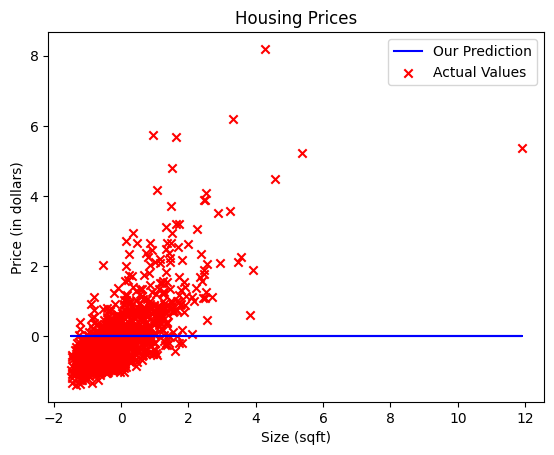

In [52]:
tmp_f_wb = compute_model_output(x_train_normal,w, b,)

# Plot our model prediction
plt.plot(x_train_normal, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train_normal, y_train_normal, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in dollars)')
# Set the x-axis label
plt.xlabel('Size (sqft)')
plt.legend()
plt.show()

def compute_gradient_descent(x_train_normal, y_train_normal, w, b):
  m = x_train_normal.shape[0] # Use the normalized x_train for gradient calculation
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    f_wb = x_train_normal[i] * w + b
    dj_dw_i = (f_wb - y_train_normal[i]) * x_train_normal[i] # Use normalized x_train for gradient calculation
    dj_db_i = f_wb - y_train_normal[i] # Calculate dj_db_i as a scalar
    dj_db += dj_db_i
    dj_dw += dj_dw_i
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw, dj_db

In [53]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient_descent(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost(x_train_normal, y_train_normal, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

In [54]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 1000
tmp_alpha = 0.01
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train_normal ,y_train_normal, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient_descent)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 4.95e-01  dj_dw: -7.050e-01, dj_db:  2.801e-17   w:  7.050e-03, b:-2.80054e-19
Iteration  100: Cost 2.84e-01  dj_dw: -2.581e-01, dj_db:  7.594e-17   w:  4.495e-01, b:-7.63581e-17
Iteration  200: Cost 2.56e-01  dj_dw: -9.446e-02, dj_db:  4.319e-17   w:  6.115e-01, b:-1.31719e-16
Iteration  300: Cost 2.52e-01  dj_dw: -3.457e-02, dj_db: -7.105e-18   w:  6.708e-01, b:-1.66616e-16
Iteration  400: Cost 2.52e-01  dj_dw: -1.266e-02, dj_db: -1.665e-18   w:  6.925e-01, b:-1.67010e-16
Iteration  500: Cost 2.51e-01  dj_dw: -4.632e-03, dj_db:  2.998e-18   w:  7.004e-01, b:-1.67123e-16
Iteration  600: Cost 2.51e-01  dj_dw: -1.696e-03, dj_db: -1.110e-18   w:  7.033e-01, b:-1.67578e-16
Iteration  700: Cost 2.51e-01  dj_dw: -6.206e-04, dj_db:  7.772e-19   w:  7.044e-01, b:-1.66761e-16
Iteration  800: Cost 2.51e-01  dj_dw: -2.272e-04, dj_db: -2.998e-18   w:  7.048e-01, b:-1.67200e-16
Iteration  900: Cost 2.51e-01  dj_dw: -8.315e-05, dj_db: -2.998e-18   w:  7.049e-01, b:-1.68822e-16


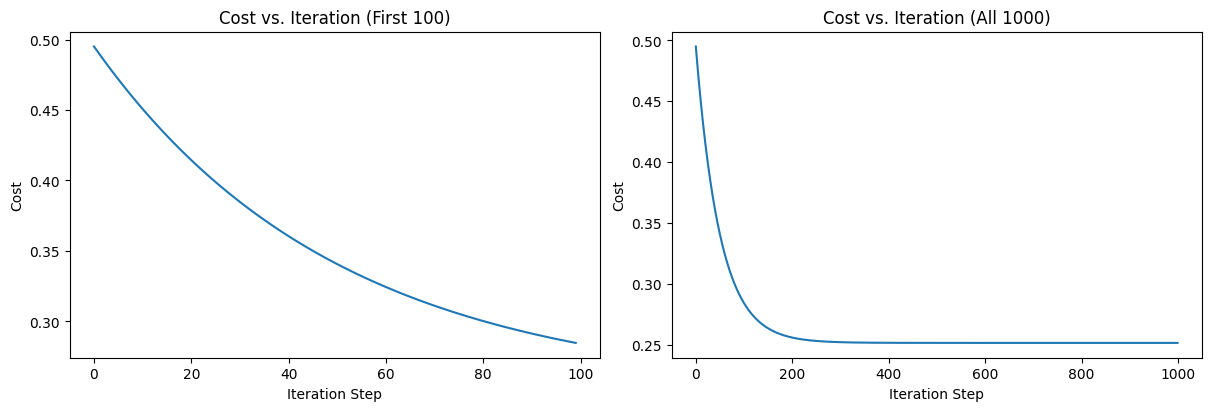

In [69]:
# Assuming J_hist is a list with your cost history for 1000 iterations

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

# Plot 1: The first 100 iterations to see the steep initial drop
ax1.plot(J_hist[:100])
ax1.set_title("Cost vs. Iteration (First 100)")
ax1.set_xlabel('Iteration Step')
ax1.set_ylabel('Cost')

# Plot 2: All 1000 iterations to see the full picture
# FIX: Plot the entire J_hist list
ax2.plot(J_hist)
ax2.set_title("Cost vs. Iteration (All 1000)")
ax2.set_xlabel('Iteration Step')
ax2.set_ylabel('Cost')

plt.show()

In [66]:
# n = int(input(""))
# x_new = np.zeros(n)
# for i in range(n):
#   x_new[i] = int(input(""))

# for i in range(len(x_new)):
#   print(w_final * x_new[i] + b_final)

1
2200
1550.9850612839932


In [71]:
x_mean = np.mean(x_train)
x_std = np.std(x_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

def predict_house_price(sqft_input, x_mean, x_std, y_mean, y_std, w, b):
  """
  Correctly predicts a house price by handling normalization and de-normalization.
  """
  # 1. Normalize the new input
  x_normalized = (sqft_input - x_mean) / x_std
  # 2. Make a prediction in the normalized space
  prediction_normalized = x_normalized * w + b
  # 3. De-normalize the prediction to get the actual price
  prediction_actual = (prediction_normalized * y_std) + y_mean
  return prediction_actual


# --- Step 3: Loop for Multiple User Inputs ---

try:
  # Ask the user how many predictions they want to make
  n_str = input("How many house prices do you want to predict? ")
  n = int(n_str)

  # Loop 'n' times
  for i in range(n):
    # Get the square footage for each house
    sqft_str = input(f"Enter square footage for house #{i+1}: ")
    house_sqft = float(sqft_str)

    # Call the prediction function
    predicted_price = predict_house_price(
        house_sqft, x_mean, x_std, y_mean, y_std, w_final, b_final
    )

    # Print the individual result
    print(f"Predicted price: ${predicted_price:,.2f}\n")

except ValueError:
  print("Invalid input. Please enter a valid number.")

How many house prices do you want to predict? 2
Enter square footage for house #1: 2200
Predicted price: $566,856.50

Enter square footage for house #2: 3000
Predicted price: $757,051.90

